In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HR_Data.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
data.shape

(14999, 10)

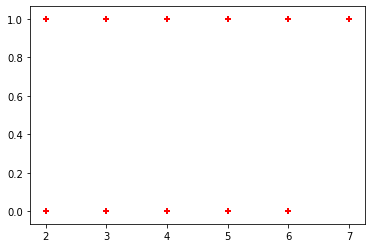

In [6]:
plt.scatter(data['number_project'], data['left'], marker = "+", color = 'r')

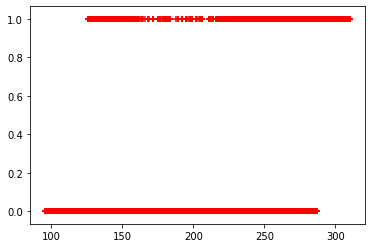

In [9]:
plt.scatter(data['average_montly_hours'], data['left'], marker = '+', color = 'r')

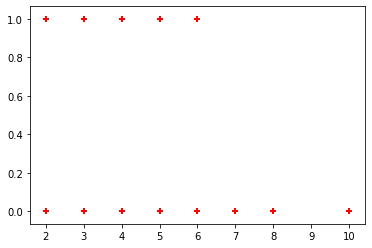

In [10]:
plt.scatter(data['time_spend_company'], data['left'], marker = '+', color = 'r')

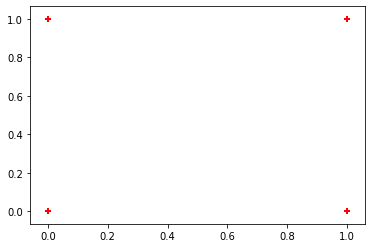

In [11]:
plt.scatter(data['promotion_last_5years'], data['left'], marker = '+', color = 'r')

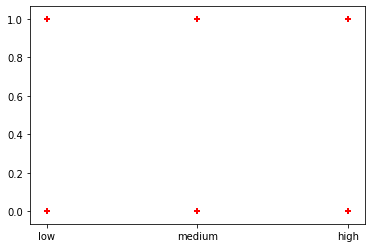

In [12]:
plt.scatter(data['salary'], data['left'], marker = '+', color = 'r')

In [13]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Impact of salary

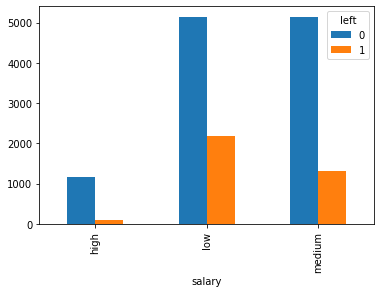

In [15]:
pd.crosstab(data.salary, data.left).plot(kind = 'bar')

### Based on Department

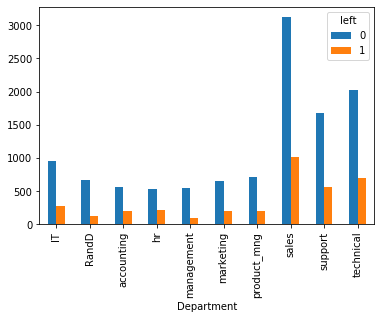

In [16]:
pd.crosstab(data.Department, data.left).plot(kind = 'bar')

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
data1 = data[['satisfaction_level', 'average_montly_hours', 'number_project', 'salary']]

In [20]:
data1.head()

,satisfaction_level,average_montly_hours,number_project,salary
0,0.38,157,2,low
1,0.80,262,5,medium
2,0.11,272,7,medium
3,0.72,223,5,low
4,0.37,159,2,low


### getting salary dummies

In [21]:
salary_dummies = pd.get_dummies(data1.salary)

In [22]:
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [23]:
salary_dummies = pd.get_dummies(data1.salary, prefix = "salary")

In [25]:
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [46]:
data2 = pd.concat([data1, salary_dummies], axis = 'columns')

In [47]:
data2.head()

,satisfaction_level,average_montly_hours,number_project,salary,salary_high,salary_low,salary_medium
0,0.38,157,2,low,0,1,0
1,0.80,262,5,medium,0,0,1
2,0.11,272,7,medium,0,0,1
3,0.72,223,5,low,0,1,0
4,0.37,159,2,low,0,1,0


In [48]:
data2.drop(['salary'], inplace = True, axis = 'columns')

In [49]:
data2.head()

,satisfaction_level,average_montly_hours,number_project,salary_high,salary_low,salary_medium
0,0.38,157,2,0,1,0
1,0.80,262,5,0,0,1
2,0.11,272,7,0,0,1
3,0.72,223,5,0,1,0
4,0.37,159,2,0,1,0


In [50]:
x = data2

In [51]:
x.head()

,satisfaction_level,average_montly_hours,number_project,salary_high,salary_low,salary_medium
0,0.38,157,2,0,1,0
1,0.80,262,5,0,0,1
2,0.11,272,7,0,0,1
3,0.72,223,5,0,1,0
4,0.37,159,2,0,1,0


In [52]:
y = data.left

In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

In [76]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy of the model

In [78]:
model.score(x_test, y_test)

0.7803809523809524

In [79]:
x_train.head()

,satisfaction_level,average_montly_hours,number_project,salary_high,salary_low,salary_medium
4197,0.67,152,6,0,0,1
9340,0.77,263,5,1,0,0
3048,0.82,285,5,0,1,0
3067,0.89,175,3,0,0,1
12291,0.87,231,5,0,1,0


In [69]:
y_train.head()

7480     0
14737    1
993      1
10252    0
1969     1
Name: left, dtype: int64